# Technology

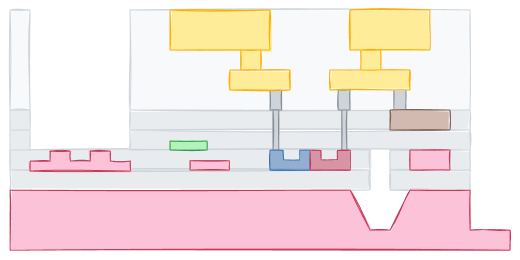

A typical fabrication process for microelectronics or photonics involves many layers of materials and processing steps to create active and passive devices.
A process design kit (PDK) provided by the foundry describes this fabrication process, allowing us to convert 2D layout files to 3D representation of devices needed for electromagnetic simulations.
In PhotonForge, this information is stored as a [Technology](../_autosummary/photonforge.Technology.rst) object.

## Loading a Technology

PhotonForge makes it really easy to load a technology and customize it.
Each available PDK includes a technology function that can be called to create a `Technology` object with the desired specifications.

As an example, we will use the [SiEPIC OpenEBL](https://siepic.ca/openebl/) PDK through the `siepic_forge` module.

In [1]:
import photonforge as pf
import siepic_forge as siepic

The technology function in the `siepic_forge` module is called `ebeam`, which defines the various layers, materials, thicknesses, and ports that we can use to build devices in this open-source platform.

If we want to, we can inspect the function to find out which parameters can be set:

In [2]:
siepic.ebeam?

The default parameters represent the normal fabrication process for SiEPIC e-beam runs, but we can change those defaults if we want to test process variations.

We use the defaults to configure our project:

In [3]:
pf.config.default_technology = siepic.ebeam()

That's it!
In 3 lines, we have loaded SiEPIC's e-beam PDK and configured it to be the default technology in this PhotonForge project.

**Note:** PhotonForge supports a growing list of PDKs, and we are happy to assist you in creating your own custom technology if you require a specific process!

## Technology Contents

Now that we have loaded the e-beam PDK, we can inspect this technology to find its definitions.
Besides a name and version, all technologies contain 4 main attributes:

- [background_medium](../_autosummary/photonforge.Technology.rst#photonforge.Technology.background_medium): Tidy3D [medium](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/mediums.html) used as default background material for the extruded 3D device.
- [layers](../_autosummary/photonforge.Technology.rst#photonforge.Technology.layers): dictionary of [layer specifications](../_autosummary/photonforge.LayerSpec.rst) that contain all layers available in the PDK.
- [extrusion_specs](../_autosummary/photonforge.Technology.rst#photonforge.Technology.extrusion_specs): list of [extrusion specifications](../_autosummary/photonforge.ExtrusionSpec.rst) that describe how the geometries from each layer are combined and extruded to generate the 3D device.
- [ports](../_autosummary/photonforge.Technology.rst#photonforge.Technology.ports): dictionary of [port specifications](../_autosummary/photonforge.PortSpec.rst) describing the ports (waveguide profiles) used by default within the PDK.

In most cases, the layer and port dictionaries are the most used when creating components.
These are the layers defined in the SiEPIC e-beam PDK:

In [4]:
pf.config.default_technology.layers

{'BlackBox': LayerSpec(layer=(998, 0), description="SiEPIC", color="#00408018", pattern="solid"),
 'FDTD': LayerSpec(layer=(733, 0), description="SiEPIC", color="#80005718", pattern="hollow"),
 'FbrTgt': LayerSpec(layer=(81, 0), description="SiEPIC", color="#00408018", pattern="/"),
 'Errors': LayerSpec(layer=(999, 0), description="SiEPIC", color="#00008018", pattern="/"),
 'PinRecM': LayerSpec(layer=(1, 11), description="SiEPIC", color="#00408018", pattern="/"),
 'DevRec': LayerSpec(layer=(68, 0), description="SiEPIC", color="#00408018", pattern="hollow"),
 'Chip design area': LayerSpec(layer=(290, 0), description="Misc", color="#80005718", pattern="hollow"),
 'Dicing': LayerSpec(layer=(210, 0), description="Misc", color="#a0a0c018", pattern="solid"),
 'Deep Trench': LayerSpec(layer=(201, 0), description="Misc", color="#c0c0c018", pattern="solid"),
 'FloorPlan': LayerSpec(layer=(99, 0), description="Misc", color="#8000ff18", pattern="hollow"),
 'PinRec': LayerSpec(layer=(1, 10), descr

Any place where a layer must be specified will accept a layer name instead of the layer tuple and use this dictionary to match the name.
More information about layers can be found in the [layers guide](Layers.ipynb).

Similarly, we can take a look at the available ports:

In [5]:
pf.config.default_technology.ports

{'SiN_TE_1310_750': PortSpec(description="SiN Strip TE 1310 nm, w=750 nm", width=3, limits=(-1, 1.4), num_modes=1, polarization="", target_neff=2.1, path_profiles={(0.75, 0, (1, 5))}),
 'TE_1550_500': PortSpec(description="Strip TE 1550 nm, w=500 nm", width=2, limits=(-1, 1.22), num_modes=1, polarization="", target_neff=3.5, path_profiles={(0.5, 0, (1, 0))}),
 'TE_1310_410': PortSpec(description="Strip TE 1310 nm, w=410 nm", width=2, limits=(-1, 1.22), num_modes=1, polarization="", target_neff=3.5, path_profiles={(0.41, 0, (1, 0))}),
 'SiN_TE_895_450': PortSpec(description="SiN Strip TE 895 nm, w=450 nm", width=4, limits=(-2, 2.4), num_modes=2, polarization="", target_neff=2.1, path_profiles={(0.45, 0, (1, 5))}),
 'SiN_TM_1310_750': PortSpec(description="SiN Strip TM 1310 nm, w=750 nm", width=3, limits=(-1.5, 1.9), num_modes=2, polarization="", target_neff=2.1, path_profiles={(0.75, 0, (1, 5))}),
 'TE_1310_350': PortSpec(description="Strip TE 1310 nm, w=350 nm", width=2, limits=(-1, 1.

If required, [new port specifications](Ports.ipynb) can also be included to allow us to work with custom waveguide interconnections.